Machine Intelligence 2 - Exercise 6 - Maximizing Nongaussianity

Group : Poulami Ghosh, Julie Morgan, Bramantyo Supriyatno 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import itertools

Exercise H7.1: Simulated Annealing

In [2]:
# A: INITIALIZATION 
init_beta = 1.01
tau = 1.01

N = 6

init_states = np.random.choice([-1, 1], size=N)

W = np.random.uniform(low=-1, high=1, size=(N,N))
W = (W+W.T)/2 # creating symmetric matrix 
W -= np.eye(N)*W

print(W)

[[ 0.          0.26563913 -0.31024777 -0.35217298  0.6815222  -0.00743421]
 [ 0.26563913  0.          0.3314872  -0.17370524  0.41584749 -0.53294034]
 [-0.31024777  0.3314872   0.          0.2581293   0.41462321 -0.23003537]
 [-0.35217298 -0.17370524  0.2581293   0.          0.37770098 -0.41629574]
 [ 0.6815222   0.41584749  0.41462321  0.37770098  0.          0.00582216]
 [-0.00743421 -0.53294034 -0.23003537 -0.41629574  0.00582216  0.        ]]


In [3]:
# B: OPTIMIZATION
M = [1, 20]
t = np.arange(0,300,1)

def cost(weights, states):
    return -0.5 * np.sum((W @ states) * states)

def state_prob(cost, beta):
     return np.exp(-beta * cost)

def get_p(del_e, beta):
    return 1 / (1 + np.exp(beta * del_e))

def update_states(states, m, beta):
    for i in range(m):
        node = np.random.choice(N, size=1)
        del_e = (W[node] @ states) * states[node]
        prob = get_p(del_e, beta)
        if np.random.rand() < prob:            
            states[node] *= -1
    energy = -0.5 * np.sum((W @ states) * states)
    return states, energy

def optimization(init_states, init_beta, m, t, tau):
    new_states = init_states.copy()
    beta = init_beta

    betas = []
    updated_states = []
    energies = []

    for i in range(t.shape[0]):
        new_states, energy = update_states(new_states, m, beta)
        beta *= tau

        betas.append(beta)
        updated_states.append(new_states.copy())
        energies.append(energy)

    return updated_states, np.array(betas), np.array(energies)
    

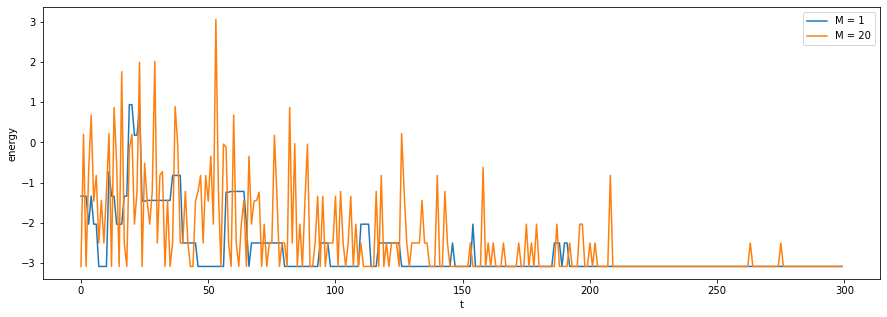

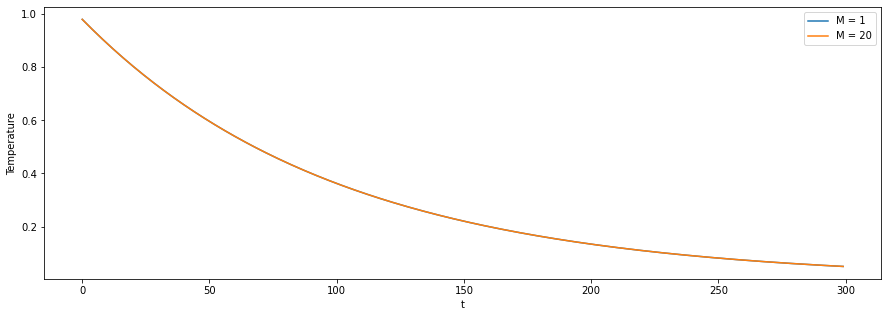

In [4]:
# C: Visualization:

result0 = optimization(init_states, init_beta, M[0], t, tau)
result1 = optimization(init_states, init_beta, M[1], t, tau)

fig = plt.subplots(figsize=(15, 5))
plt.plot(t, result0[2], label = 'M = 1')
plt.plot(t, result1[2], label = 'M = 20')
plt.legend()
plt.xlabel('t')
plt.ylabel('energy')
plt.show()

fig = plt.subplots(figsize=(15, 5))
plt.plot(t, 1/result0[1], label = 'M = 1')
plt.plot(t, 1/result1[1], label = 'M = 20')
plt.legend()
plt.xlabel('t')
plt.ylabel('Temperature')
plt.show();

In [5]:
all_states = np.array(list(itertools.product([-1,1], repeat=6)))
all_energies =  np.zeros(all_states.shape[0])
probs1 = np.zeros(all_states.shape[0])
probs2 = np.zeros(all_states.shape[0])
probs3 = np.zeros(all_states.shape[0])
for i in range(all_states.shape[0]):
    s = all_states[i]
    all_energies[i] = cost(W, s)

#beta1 = result1[1][0]
#beta2 = result1[1][250]

beta1 = 0.01
beta2 = 0.5
beta3 = 2

for i in range(all_states.shape[0]):
    probs1[i] = state_prob(all_energies[i], beta1)
    probs2[i] = state_prob(all_energies[i], beta2)
    probs3[i] = state_prob(all_energies[i], beta3)

probs1 = probs1 / np.sum(probs1)
probs2 = probs2 / np.sum(probs2)
probs3 = probs3 / np.sum(probs3)

[]

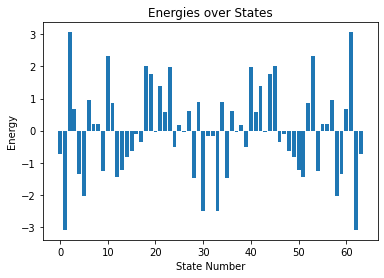

In [6]:
plt.bar(np.arange(all_states.shape[0]), all_energies)
plt.title('Energies over States')
plt.xlabel('State Number')
plt.ylabel('Energy')
plt.plot()

[]

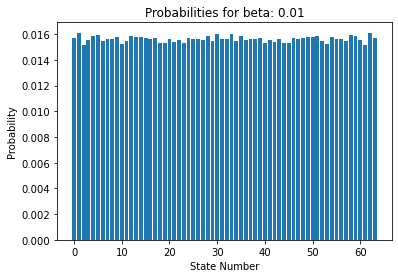

In [7]:
plt.bar(np.arange(all_states.shape[0]), probs1)
plt.title('Probabilities for beta: {}'.format(beta1))
plt.xlabel('State Number')
plt.ylabel('Probability')
plt.plot()

[]

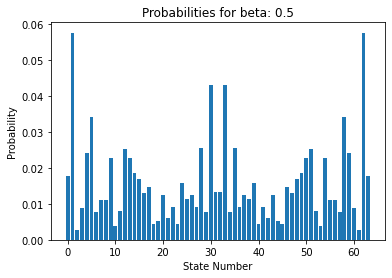

In [8]:
plt.bar(np.arange(all_states.shape[0]), probs2)
plt.title('Probabilities for beta: {}'.format(beta2))
plt.xlabel('State Number')
plt.ylabel('Probability')
plt.plot()

[]

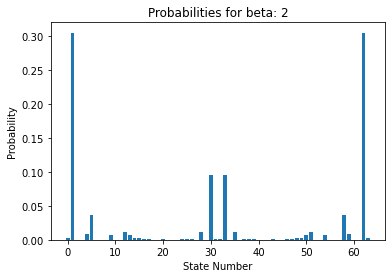

In [9]:
plt.bar(np.arange(all_states.shape[0]), probs3)
plt.title('Probabilities for beta: {}'.format(beta3))
plt.xlabel('State Number')
plt.ylabel('Probability')
plt.plot()

Exercise H7.2: Mean-Field Annealing

In [10]:
def update_states_mf(states, beta,  eps=1e-6):
    error = 1
    past_mf = np.ones_like(states)
    while error > eps:

        mean_fields = -W @ states
        states = np.tanh(-beta * mean_fields)

        error = np.max(np.abs(past_mf-mean_fields))
        past_mf = mean_fields
    energy = -0.5 * np.sum((W @ states) * states)

    return states, energy

def optimization_mf(init_states, init_beta, t, tau):
    new_states = init_states.copy()
    beta = init_beta

    betas = []
    updated_states = []
    energies = []

    for i in range(t.shape[0]):
        new_states, energy = update_states_mf(new_states, beta)
        beta *= tau

        betas.append(beta)
        updated_states.append(new_states.copy())
        energies.append(energy)

    return updated_states, np.array(betas), np.array(energies)
    

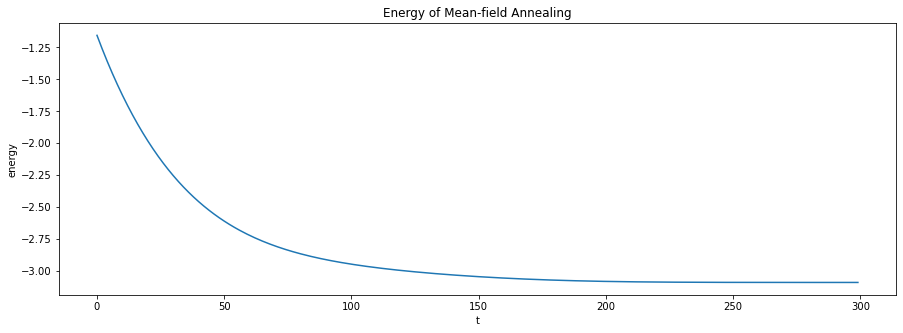

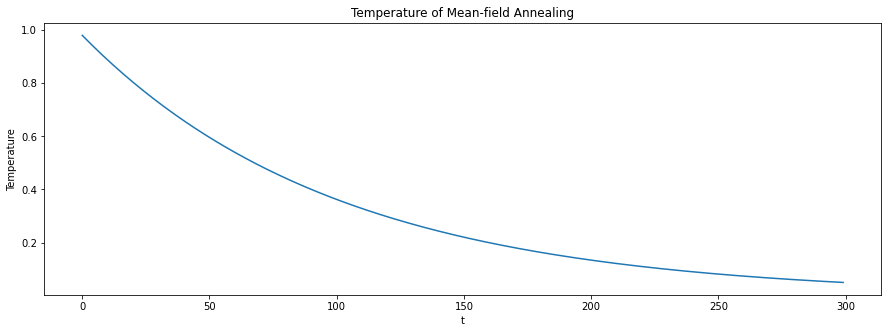

In [11]:
np.random.seed(1)

init_states_mf = 0.1* np.random.uniform(low=-1, high=1, size=N)
result_mf = optimization_mf(init_states_mf, init_beta, t, tau)

fig = plt.subplots(figsize=(15, 5))
plt.plot(t, result_mf[2])
plt.title('Energy of Mean-field Annealing')
plt.xlabel('t')
plt.ylabel('energy')
plt.show()

fig = plt.subplots(figsize=(15, 5))
plt.plot(t, 1/result_mf[1])
plt.title('Temperature of Mean-field Annealing')
plt.xlabel('t')
plt.ylabel('Temperature')
plt.show();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce9ccaa6-f763-4a5b-9238-b88f63aa3e54' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>